In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Get data set
df = pd.read_csv('dataset\salary_data.csv')
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Hp\AppData\Local\Temp\ipykernel_7764\3179695552.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('dataset\salary_data.csv')


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
year_experience = df['YearsExperience']

In [4]:
salary = df['Salary']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [6]:
# Describe data
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


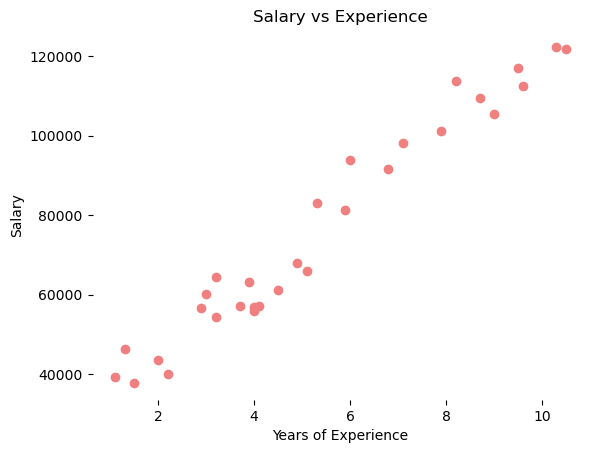

In [7]:
# Data distrubution
plt.scatter(year_experience, salary, color='lightcoral')
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.box(False)
plt.show()

In [8]:
# Splitting the data
X = df.iloc[:, :1]
y = df.iloc[:, 1:]

In [9]:
X

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [10]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

In [13]:
# Print regressor coefficients and intercept
print(f'Regressor Coefficients: {regressor.coef_}')
print(f'Regressor Intercept: {regressor.intercept_}')

# Calculate R-squared scores for test and training sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate Mean Squared Error for test and training sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Print R-squared scores with clear labels
print(f'R-squared (Training Set): {r2_train:.2f}')
print(f'R-squared (Test Set): {r2_test:.2f}')

# Print Mean Squared Error with clear labels
print(f'Mean Squared Error (Training Set): {mse_train:.2f}')
print(f'Mean Squared Error (Test Set): {mse_test:.2f}')


Regressor Coefficients: [[9438.57793873]]
Regressor Intercept: [25947.02545398]
R-squared (Training Set): 0.96
R-squared (Test Set): 0.94
Mean Squared Error (Training Set): 30160693.03
Mean Squared Error (Test Set): 35761528.05


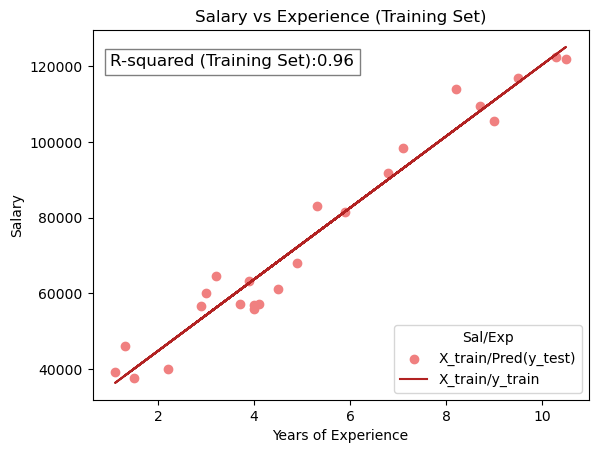

In [14]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.text(1, 120000, f'R-squared (Training Set):{r2_train :.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
# plt.box(False)
plt.show()

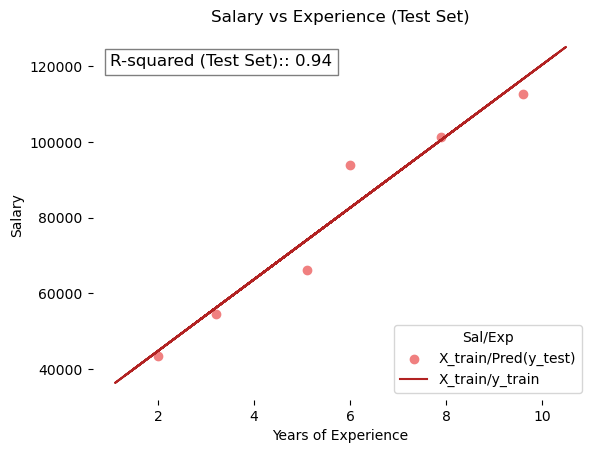

In [15]:
# Prediction on test set
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.text(1, 120000, f'R-squared (Test Set):: {r2_test:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
plt.box(False)
plt.show()

In [16]:
import gradio as gr

def predict_salary(years_experience):
    try:
        prediction = regressor.predict([[years_experience]])
        return prediction[0][0]
    except Exception as e:
        return str(e)

interface = gr.Interface(
    fn=predict_salary,
    inputs=gr.Number(label="Years of Experience"),
    outputs=gr.Textbox(label="Predicted Salary"),
    title="Salary Prediction Model",
    description="Enter the number of years of experience to predict the salary."
)

interface.launch()


c:\Users\Hp\miniconda3\envs\machine_learning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7864

To create a public link, set `share=True` in `launch()`.
